In [91]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.sandbox.predict_functional import predict_functional
from statsmodels.graphics.regressionplots import add_lowess

In [2]:
path = './Financial_Risk_Participants_Data/Financial_Risk_Participants_Data/'
files = os.listdir(path)
filename = files[-1]

train_df = pd.read_csv(path+filename)

In [3]:
train_df.shape

(543, 8)

In [4]:
train_df

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
...,...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1,0
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
City                    543 non-null int64
Location_Score          543 non-null float64
Internal_Audit_Score    543 non-null int64
External_Audit_Score    543 non-null int64
Fin_Score               543 non-null int64
Loss_score              543 non-null int64
Past_Results            543 non-null int64
IsUnderRisk             543 non-null int64
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [6]:
for i in ['City','External_Audit_Score','Internal_Audit_Score','Fin_Score','Loss_score','Past_Results','Internal_Audit_Score', 'External_Audit_Score']:
    print(i,train_df[i].nunique())

City 43
External_Audit_Score 13
Internal_Audit_Score 13
Fin_Score 13
Loss_score 10
Past_Results 7
Internal_Audit_Score 13
External_Audit_Score 13


<B>Categorical Variables:</B> 
1. City
2. IsUnderRisk (Target Variable, Binary - 0/1)

<B>Continuous Variables: </B>
1. Location_Score

<B>Ordinal Variables: </B>
1. Fin_Score
2. Loss_score 
3. Past_Results 
4. Internal_Audit_Score
5. External_Audit_Score
6. Internal_Audit_Score
7. External_Audit_Score

What is the Proportion of High Risk & No Risk Entities ?

In [7]:
train_df['IsUnderRisk'].value_counts(normalize=True)

1    0.626151
0    0.373849
Name: IsUnderRisk, dtype: float64

**Observation:** Definitely releaved to see that the distribution of the two classes are not skewed. But in fact, shocked to see High Risk entities are majority class. 

**What is the distribution of Location_Score?**

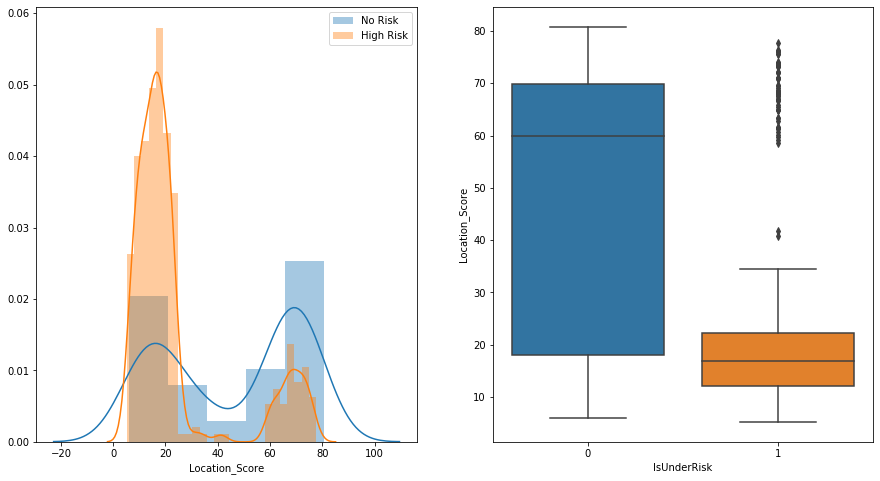

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df[train_df['IsUnderRisk']==0]['Location_Score'],ax=ax[0])
sns.distplot(train_df[train_df['IsUnderRisk']==1]['Location_Score'],ax=ax[0])
sns.boxplot(train_df['IsUnderRisk'],train_df['Location_Score'],ax=ax[1])
ax[0].legend(['No Risk','High Risk'])
plt.show()

1. **No Risk:** The range & standard deviation of Location_Score is much wider than of *High Risk* entities. The Mean value is also much higher than that of *High Risk* entities. There are no as such outliers in Location_Score for *No Risk* entities.
2. **High Risk:** The range is much shorter than *No Risk* entities. The mean Location is also much lower than that of the other class. However, there is a substantial amount of *Outliers* in this variable for *High Risk* entitites.

**Is there any significant association between City and Location_Score?**

In [10]:
results = ols('Location_Score ~ C(City)', data=train_df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Location_Score   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.011
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.455
Time:                        06:51:43   Log-Likelihood:                -2493.2
No. Observations:                 543   AIC:                             5072.
Df Residuals:                     500   BIC:                             5257.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        38.6491      8.795      4.394      0.000      21.369      55.929
C(City)[T.1]     -8.9573     11.025     -0.812      0.417     -30.619      12.705
C(City)[T.2]     -8.4095      9.865     -0.852      0.394     -27.792      10.973
C(City)[T.3]      0.7140     10.211      0.070      0.944     -19.348      20.776
C(City)[T.4]     -5.5650     10.891     -0.511      0.610     -26.963      15.833
C(City)[T.5]     -3.6430     10.014     -0.364      0.716     -23.317      16.031
C(City)[T.6]     -9.8027      9.677     -1.013      0.312     -28.815       9.210
C(City)[T.7]     20.2249     26.386      0.767      0.444     -31.616      72.065
C(City)[T.8]      1.3710     11.800      0.116      0.908     -21.813      24.555
C(City)[T.9]    -11.3855      9.545     -1.193      0.234     -30.139       7.368
C(City)[T.10]    -8.2068      9.749     -0.842      0.400     -27.360      10.947
C(City)[T.11]   -18.9805     16.842     -1.127      0.260     -52.069      14.109
C(City)[T.12]    17.4939     16.842      1.039      0.299     -15.595      50.583
C(City)[T.13]    -9.0801     10.571     -0.859      0.391     -29.848      11.688
C(City)[T.14]   -24.7911     26.386     -0.940      0.348     -76.632      27.049
C(City)[T.15]   -21.7071     26.386     -0.823      0.411     -73.548      30.133
C(City)[T.16]     2.8532     13.435      0.212      0.832     -23.543      29.249
C(City)[T.17]     1.5394     12.875      0.120      0.905     -23.756      26.835
C(City)[T.18]    -3.0720     13.435     -0.229      0.819     -29.468      23.324
C(City)[T.19]     4.3915     11.025      0.398      0.691     -17.270      26.053
C(City)[T.20]   -14.0661     19.667     -0.715      0.475     -52.706      24.573
C(City)[T.21]   -18.8801     16.842     -1.121      0.263     -51.969      14.209
C(City)[T.22]   -19.9416     12.875     -1.549      0.122     -45.237       5.354
C(City)[T.23]    -6.7675     10.485     -0.645      0.519     -27.367      13.832
C(City)[T.24]   -15.5271     26.386     -0.588      0.556     -67.368      36.313
C(City)[T.25]   -18.4851     26.386     -0.701      0.484     -70.326      33.355
C(City)[T.26]   -28.0421     26.386     -1.063      0.288     -79.883      23.798
C(City)[T.27]    13.7885     16.842      0.819      0.413     -19.300      46.878
C(City)[T.28]   -13.0226     13.435     -0.969      0.333     -39.418      13.373
C(City)[T.29]   -25.1811     16.842     -1.495      0.135     -58.270       7.908
C(City)[T.30]   -25.0440     12.875     -1.945      0.052     -50.340       0.252
C(City)[T.31]    -1.9258     10.105     -0.191      0.849     -21.779      17.928
C(City)[T.32]   -29.1505     16.842     -1.731      0.084     -62.239       3.939
C(City)[T.33]   -21.7681     26.386     -0.825      0.410     -73.609      30.072
C(City)[T.35]     5.9112     13.435      0.440   

**Observation:** Even from this OLS model fit is sufficiently showing that the coefficients for City variable is very much unsignificant, which suggest no correlation between *City* & *Location_Score*. 

Still for the sake of robustness we will do a ANOVA test.


In [11]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(City),26278.502413,42.0,1.011038,0.45526
Residual,309423.977776,500.0,NaN,NaN


**Observation:** Reassured that there is no association between *City* & *Location_Score*. Therefore, we can keep both of the variables while modelling. 

**In the sample of 543 entities, Is there any difference in mean scores between *High Risk* and *No Risk* entities?**

A 2-sided independent t-test

H<sub>0</sub>: x_hat<sub>0</sub> - x_hat<sub>1</sub> = 0<br>
H<sub>1</sub>: x_hat<sub>0</sub> - x_hat<sub>1</sub> &ne; 0

Significance Level &alpha; = 0.05


In [36]:
alpha = 0.05
var = ['Fin_Score','Loss_score','Past_Results','Internal_Audit_Score','External_Audit_Score','Internal_Audit_Score','External_Audit_Score']
for v in var:
    tstat, pval, dof = sm.stats.ttest_ind(train_df[train_df['IsUnderRisk']==1][v],train_df[train_df['IsUnderRisk']==0][v])
    print('-'*10+v+'-'*10+'\n')
    print('T Statistics: {} \nP Value: {}\n'.format(tstat,pval))
    if pval < alpha:
        print('We have sufficient evidence to reject Null Hypothesis\n')
    else:
        print('We DO NOT have sufficient evidence to reject Null Hypothesis\n')
    

----------Fin_Score----------

T Statistics: 9.045798901962709 
P Value: 2.656497346402697e-18

We have sufficient evidence to reject Null Hypothesis

----------Loss_score----------

T Statistics: 1.0451229403763076 
P Value: 0.2964328959604669

We DO NOT have sufficient evidence to reject Null Hypothesis

----------Past_Results----------

T Statistics: 2.3877218454994535 
P Value: 0.017295375136334324

We have sufficient evidence to reject Null Hypothesis

----------Internal_Audit_Score----------

T Statistics: 16.824946056212184 
P Value: 2.118215955574434e-51

We have sufficient evidence to reject Null Hypothesis

----------External_Audit_Score----------

T Statistics: 11.25639051513742 
P Value: 1.4865121736568723e-26

We have sufficient evidence to reject Null Hypothesis

----------Internal_Audit_Score----------

T Statistics: 16.824946056212184 
P Value: 2.118215955574434e-51

We have sufficient evidence to reject Null Hypothesis

----------External_Audit_Score----------

T Stati

--------------------------------------------------Fin_Score--------------------------------------------------



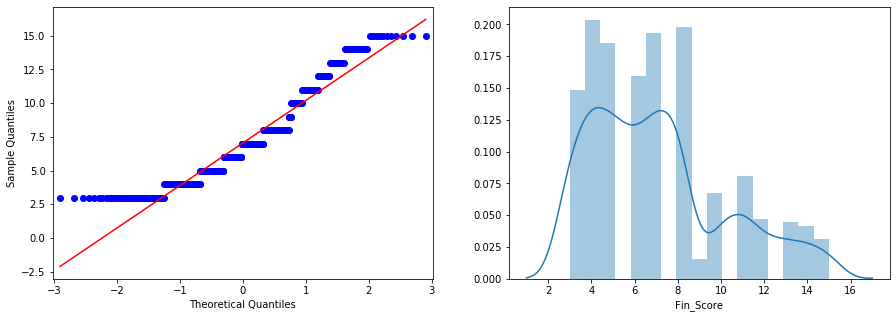

Fin_Score Standard Deviation

No Risk: 1.6736931014275522
High Risk: 3.488838453304125

--------------------------------------------------Loss_score--------------------------------------------------



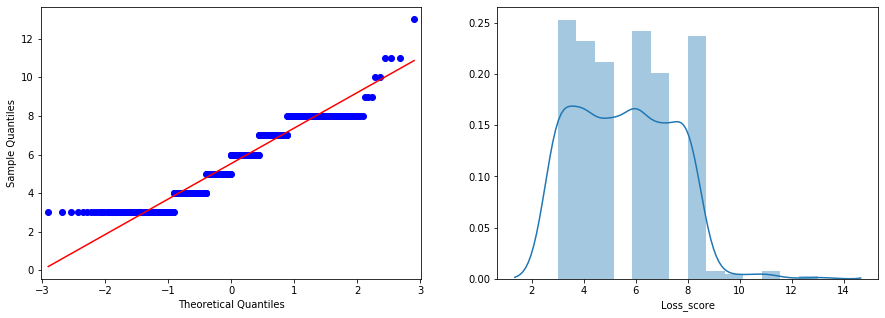

Loss_score Standard Deviation

No Risk: 1.71419019714713
High Risk: 1.9094457297781198

--------------------------------------------------Past_Results--------------------------------------------------



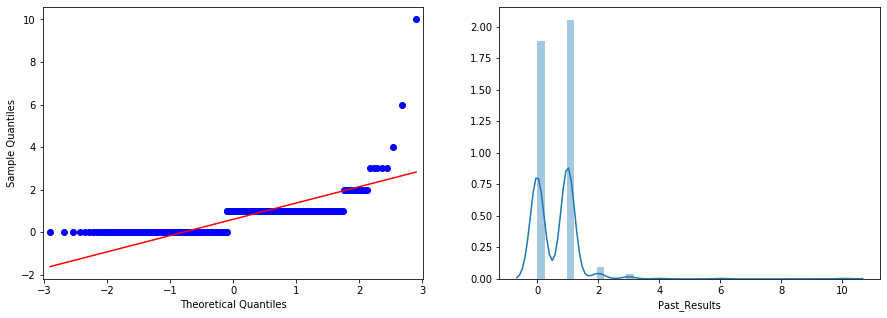

Past_Results Standard Deviation

No Risk: 0.5010840319176733
High Risk: 0.880402436650325

--------------------------------------------------Internal_Audit_Score--------------------------------------------------



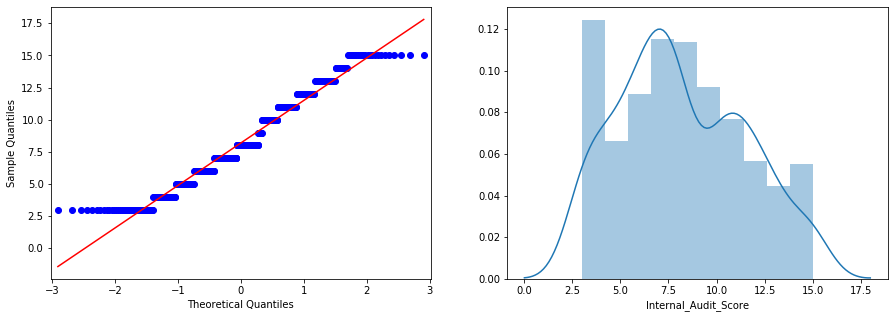

Internal_Audit_Score Standard Deviation

No Risk: 1.7035013333321731
High Risk: 3.1280220508131142

--------------------------------------------------External_Audit_Score--------------------------------------------------



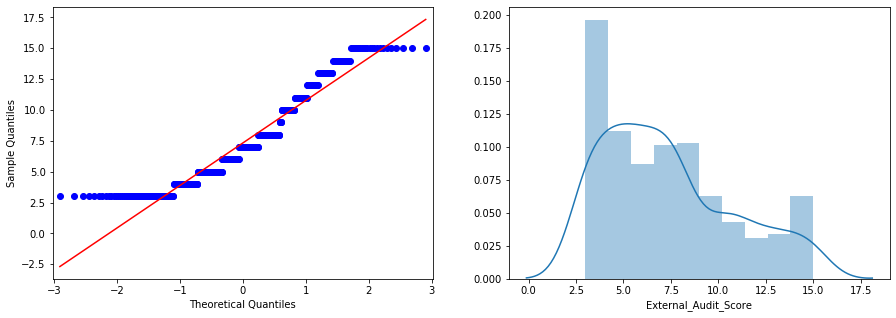

External_Audit_Score Standard Deviation

No Risk: 1.6411019550842711
High Risk: 3.717515323500566

--------------------------------------------------Internal_Audit_Score--------------------------------------------------



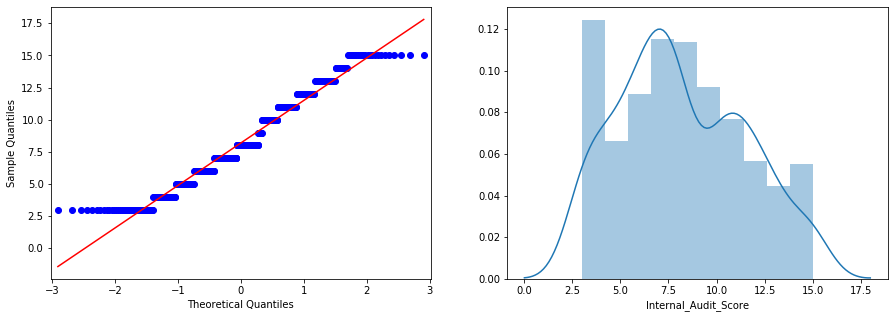

Internal_Audit_Score Standard Deviation

No Risk: 1.7035013333321731
High Risk: 3.1280220508131142

--------------------------------------------------External_Audit_Score--------------------------------------------------



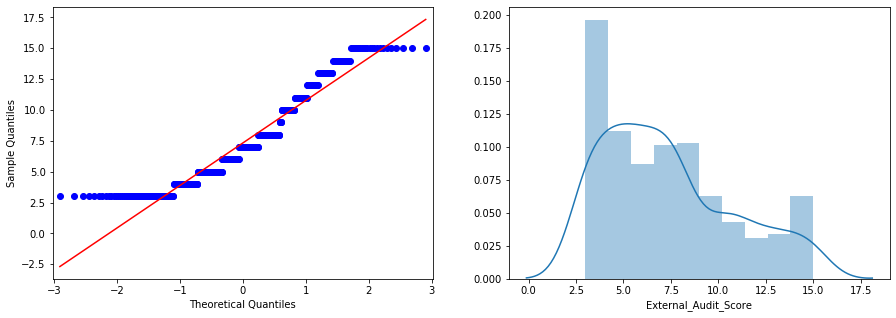

External_Audit_Score Standard Deviation

No Risk: 1.6411019550842711
High Risk: 3.717515323500566



In [33]:
var = ['Fin_Score','Loss_score','Past_Results','Internal_Audit_Score','External_Audit_Score','Internal_Audit_Score','External_Audit_Score']
for v in var:
    print('-'*50+v+'-'*50+'\n')
    fig,ax= plt.subplots(1,2,figsize=(15,5))
    sm.qqplot(train_df[v],line='s',ax=ax[0])
    sns.distplot(train_df[v],ax=ax[1])
    plt.show()
    g1 = train_df[train_df['IsUnderRisk']==0][v].std()
    g2 = train_df[train_df['IsUnderRisk']==1][v].std()
    print(v,'Standard Deviation\n')
    print('No Risk: {}\nHigh Risk: {}\n'.format(g1,g2))

In [26]:
train_df['IsUnderRisk'].value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

Even though we have a sufficiently large sample size, the distributions of the Score Variables among the High Risk & No Risk are not Normally Distributed. Also, the variances are different in 2 groups. Therefore, to check robustness of the hypothesis tests we need to check for results for Welsh ttest with Satterthwait degrees of freedom.

In [35]:
alpha = 0.05
var = ['Fin_Score','Loss_score','Past_Results','Internal_Audit_Score','External_Audit_Score','Internal_Audit_Score','External_Audit_Score']
for v in var:
    tstat, pval, dof = sm.stats.ttest_ind(train_df[train_df['IsUnderRisk']==1][v],train_df[train_df['IsUnderRisk']==0][v],usevar='unequal')
    print('-'*10+v+'-'*10+'\n')
    print('T Statistics: {} \nP Value: {}\n'.format(tstat,pval))
    if pval < alpha:
        print('We have sufficient evidence to reject Null Hypothesis\n')
    else:
        print('We DO NOT have sufficient evidence to reject Null Hypothesis\n')
    

----------Fin_Score----------

T Statistics: 10.609857703984272 
P Value: 6.085220871732586e-24

We have sufficient evidence to reject Null Hypothesis

----------Loss_score----------

T Statistics: 1.073904703095804 
P Value: 0.2834268153015829

We DO NOT have sufficient evidence to reject Null Hypothesis

----------Past_Results----------

T Statistics: 2.7185756341181904 
P Value: 0.006767209965616061

We have sufficient evidence to reject Null Hypothesis

----------Internal_Audit_Score----------

T Statistics: 19.31395335379926 
P Value: 1.6590291850001553e-63

We have sufficient evidence to reject Null Hypothesis

----------External_Audit_Score----------

T Statistics: 13.36814635792505 
P Value: 4.042798421501893e-35

We have sufficient evidence to reject Null Hypothesis

----------Internal_Audit_Score----------

T Statistics: 19.31395335379926 
P Value: 1.6590291850001553e-63

We have sufficient evidence to reject Null Hypothesis

----------External_Audit_Score----------

T Statis

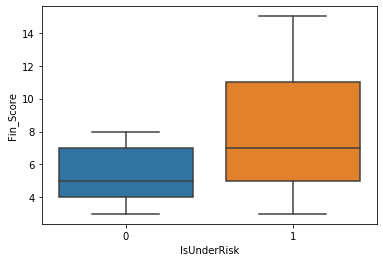

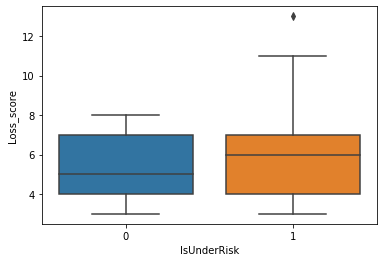

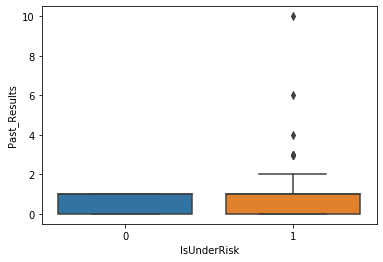

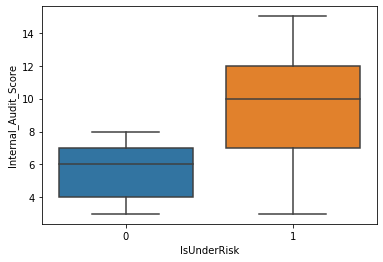

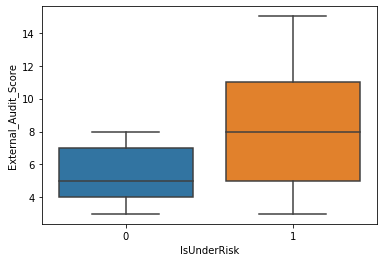

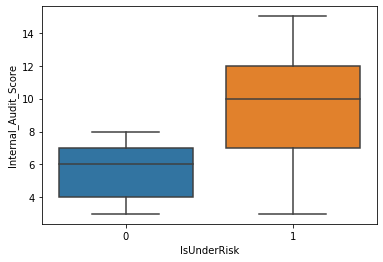

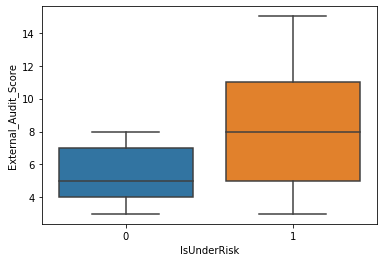

In [17]:
var = ['Fin_Score','Loss_score','Past_Results','Internal_Audit_Score','External_Audit_Score','Internal_Audit_Score','External_Audit_Score']
for v in var:
    sns.boxplot(train_df['IsUnderRisk'],train_df[v])
    plt.show()

**Observations:** 
1. From the above t-tests, It is obvious that the mean of the Score variables are different for *High Risk* and *No Risk* groups, except for *Loss_Score*. Also, this is visually evident from the above boxplots. This suggests that there is a significance of the Score Variables to classify an entity either as *High Risk* or as *No Risk*.
2. *Loss_Score* does not significantly distinguish between *High Risk* and *No Risk*, therefore, we can choose not to use it in the modelling.

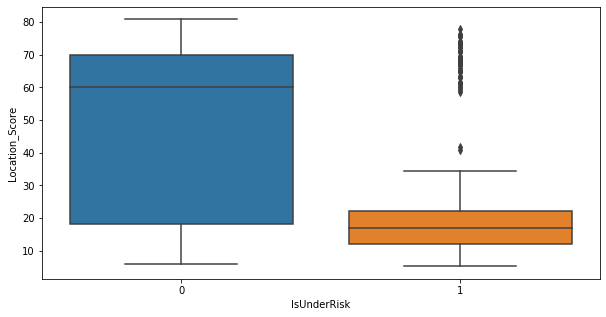

In [50]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(train_df['IsUnderRisk'],train_df['Location_Score'])
plt.show()

**In sample of Financial Entities, Is there a difference in mean of Location_Score between *High Risk* and *No Risk* entities?** 

A 2-sided independent t-test

H<sub>0</sub>: x_hat<sub>0</sub> - x_hat<sub>1</sub> = 0<br>
H<sub>1</sub>: x_hat<sub>0</sub> - x_hat<sub>1</sub> &ne; 0

Significance Level &alpha; = 0.05

In [53]:
#2 sided two sample t-test
alpha = 0.05
tstat, pval, dof = sm.stats.ttest_ind(train_df[train_df['IsUnderRisk']==1]['Location_Score'],train_df[train_df['IsUnderRisk']==0]['Location_Score'])
print('T Statistics: {} \nP Value: {}\n'.format(tstat,pval))
if pval < alpha:
    print('We have sufficient evidence to reject Null Hypothesis\n')
else:
    print('We DO NOT have sufficient evidence to reject Null Hypothesis\n')

T Statistics: -10.887865705034802 
P Value: 4.249860456523802e-25

We have sufficient evidence to reject Null Hypothesis



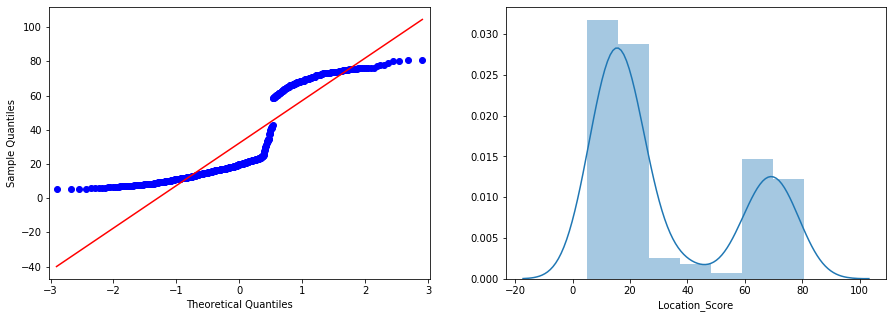

In [55]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
sm.qqplot(train_df['Location_Score'],line='s',ax=ax[0])
sns.distplot(train_df['Location_Score'],ax=ax[1])
plt.show()

In [56]:
#Welsh's t-test to combat departure from normal behaviour
alpha = 0.05
tstat, pval, dof = sm.stats.ttest_ind(train_df[train_df['IsUnderRisk']==1]['Location_Score'],train_df[train_df['IsUnderRisk']==0]['Location_Score'],usevar='unequal')
print('T Statistics: {} \nP Value: {}\n'.format(tstat,pval))
if pval < alpha:
    print('We have sufficient evidence to reject Null Hypothesis\n')
else:
    print('We DO NOT have sufficient evidence to reject Null Hypothesis\n')

T Statistics: -10.20169961098522 
P Value: 1.5884596647211892e-21

We have sufficient evidence to reject Null Hypothesis



In [54]:
model = sm.GLM.from_formula(formula='IsUnderRisk ~ Location_Score',family=sm.families.Binomial(),data=train_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            IsUnderRisk   No. Observations:                  543
Model:                            GLM   Df Residuals:                      541
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.96
Date:                Sun, 17 May 2020   Deviance:                       619.93
Time:                        11:30:05   Pearson chi2:                     544.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7554      0.167     10.504      0.000       1.428       2.083
Location_Score    -0.0365      0.004     -9.333      0.000      -0.044      -0.029
==================================================================================
"""

**Observations:**
1. The hypothesis tests showed that the difference in the mean of Location_Score in *High Risk* and *No Risk* is significant, suggesting that the dependent response variable *IsUnderRisk* can dependent on *Location_Score.
2. In the Logistic Model fit, we see that the p-value for the coefficient has as 95% CI which doesnot include 0 and the p_value is much lesser than 0.05 significance level.Therefore, it suggests that the coefficient is significant and the log-odds of IsUnderRisk decreases by 0.0365 times every time there is an unit increase in the Location_Score.

**In this sample of Financial Entities, Is there any significant association between the response variable *IsUnderRisk* and independent variable *City* ?**

The chi-square test provides a method for testing the association between the row and column variables in a two-way table. The null hypothesis H0 assumes that there is no association between the variables (in other words, one variable does not vary according to the other variable), while the alternative hypothesis Ha claims that some association does exist. The alternative hypothesis does not specify the type of association, so close attention to the data is required to interpret the information provided by the test.

H<sub>0</sub>: There is a association between the two variables<br>
H<sub>a</sub>: There is NO association between the two variables

Significance Level = &alpha; = 0.05

In [66]:
alpha = 0.05
cont_df = pd.crosstab(train_df['City'],train_df['IsUnderRisk'])
g, pval, dof, expctd = chi2_contingency(cont_df, lambda_="log-likelihood")
print('Test Statistics: {}\nP Value: {}'.format(g,pval))
if pval < alpha:
    print('We have sufficient evidence to reject Null Hypothesis\n')
else:
    print('We DO NOT have sufficient evidence to reject Null Hypothesis\n')

Test Statistics: 86.80927533747608
P Value: 5.871656853107435e-05
We have sufficient evidence to reject Null Hypothesis



**Observation:** From the results of the Chi<sup>2</sup>-Test we can conclude that there is no significant relationship between variable *City* and response *IsUnderRisk*. We can choose not to use *City* in final modelling.

**Intital Features Selected:**
1. Location_Score
2. Internal_Audit_Score
3. External_Audit_Score
4. Fin_Score
6. Past_Results

In [69]:
model = sm.GLM.from_formula(formula='IsUnderRisk ~ Location_Score + Internal_Audit_Score + External_Audit_Score + Fin_Score + Past_Results + C(City) + Loss_score',family=sm.families.Binomial(),data=train_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            IsUnderRisk   No. Observations:                  543
Model:                            GLM   Df Residuals:                      494
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -156.12
Date:                Sun, 17 May 2020   Deviance:                       312.23
Time:                        12:25:27   Pearson chi2:                     370.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.3989      1.789     -3.578      0.000      -9.904      -2.894
C(City)[T.1]            -1.8637      1.631     -1.143      0.253      -5.061       1.333
C(City)[T.2]            -0.9236      1.497     -0.617      0.537      -3.859       2.011
C(City)[T.3]            -1.4381      1.538     -0.935      0.350      -4.452       1.576
C(City)[T.4]            -1.6702      1.578     -1.058      0.290      -4.763       1.423
C(City)[T.5]            -1.6356      1.520     -1.076      0.282      -4.614       1.343
C(City)[T.6]            -0.5507      1.492     -0.369      0.712      -3.474       2.373
C(City)[T.7]           -22.7746   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
C(City)[T.8]            -2.3041      1.734     -1.329      0.184      -5.703       1.095
C(City)[T.9]            -0.6796      1.475     -0.461      0.645      -3.570       2.210
C(City)[T.10]            0.9909      1.525      0.650      0.516      -1.997       3.979
C(City)[T.11]           23.1276   3.14e+04      0.001      0.999   -6.16e+04    6.16e+04
C(City)[T.12]            0.4181      2.106      0.199      0.843      -3.709       4.546
C(City)[T.13]           -1.9945      1.562     -1.277      0.202      -5.056       1.067
C(City)[T.14]           18.2133   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
C(City)[T.15]           15.9848   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
C(City)[T.16]           -4.4552      3.188     -1.397      0.162     -10.704       1.794
C(City)[T.17]           -3.7819      1.962     -1.928      0.054      -7.627       0.064
C(City)[T.18]            0.0516      1.766      0.029      0.977      -3.409       3.512
C(City)[T.19]           -3.9642      2.363     -1.678      0.093      -8.595       0.667
C(City)[T.20]           -4.0126      5.258     -0.763      0.445     -14.317       6.292
C(City)[T.21]           17.7946   4.09e+04      0.000      1.000   -8.02e+04    8.02e+04
C(City)[T.22]           -0.8170      1.993     -0.410      0.682      -4.724       3.090
C(City)[T.23]           -0.6112      1.577     -0.387      0.698      -3.703       2.480
C(City)[T.24]           17.7710   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
C(City)[T.25]           13.7822   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
C(City)[T.26]           16.1393   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
C(City)[T.27]           -4.9852      7.136     -0.699      0.485     -18.972       9.001
C(City)[T.28]           -0.1712      2.196     -0.078      0.938      -4.476       4.134
C(City)[T.29]           19.1645   3.67e+04      0.001      1.000   -7.19e+04    7.19e+04
C(City)[T.30]           17.0781   2.59e+04      0.001      0.999   -5.08e+04    5.08e+04
C(City)[T.31]           -1.6239      1.518     -1.070    

**Inferences:** 
1. Initially, I suspected that there might be no significant association between *City*, *Loss_Score* and the response *IsUnderRisk*. It has been revalidated by the Logisitic_Model fit. The 95% CI for all the coefficients of foresaid variables include 0 and the p-values are higher than &alpha; suggesting that we have failed to reject the null hypothesis ,ie. the coefficients are significant.
2. Interestingly, the coefficient of Past_results is also insignificant.

In [79]:
del model, result

In [80]:
model = sm.GLM.from_formula(formula='IsUnderRisk ~ Location_Score + Internal_Audit_Score + External_Audit_Score + Fin_Score',family=sm.families.Binomial(),data=train_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            IsUnderRisk   No. Observations:                  543
Model:                            GLM   Df Residuals:                      538
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -197.43
Date:                Sun, 17 May 2020   Deviance:                       394.86
Time:                        13:09:26   Pearson chi2:                     412.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.3541      0.685     -7.820      0.000      -6.696      -4.012
Location_Score          -0.0254      0.005     -5.192      0.000      -0.035      -0.016
Internal_Audit_Score     0.5092      0.061      8.336      0.000       0.389       0.629
External_Audit_Score     0.2835      0.055      5.157      0.000       0.176       0.391
Fin_Score                0.1967      0.055      3.564      0.000       0.089       0.305
========================================================================================
"""

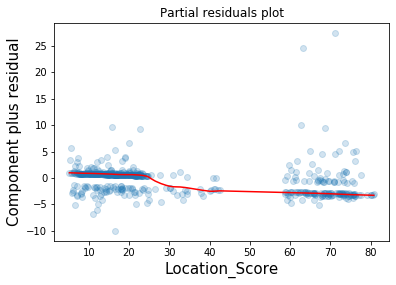

In [93]:
fig = result.plot_partial_residuals("Location_Score")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)

_ = add_lowess(ax)

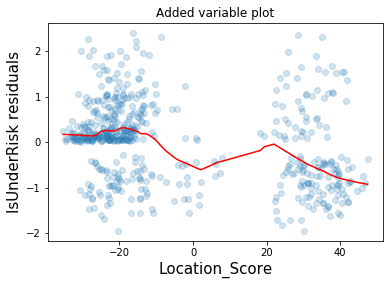

In [94]:
fig = result.plot_added_variable("Location_Score")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

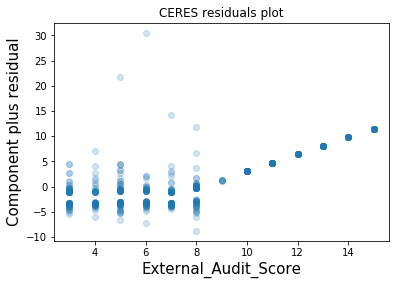

In [96]:
fig = result.plot_ceres_residuals("External_Audit_Score")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)